<a href="https://colab.research.google.com/github/laasyarg/Accident-data/blob/main/Accidents_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#GLR65
!pip install dmba

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#GLR65
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import dmba
from dmba import classificationSummary

%matplotlib inline

## Table 11.2

In [ ]:
#GLR65
example_dfGLR65 = dmba.load_data('TinyData.csv')

predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

X = example_dfGLR65[predictors]
y = example_dfGLR65[outcome]
classes = sorted(y.unique())

clf = MLPClassifier(hidden_layer_sizes=[3], activation='logistic', solver='lbfgs', random_state=1)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([
    example_dfGLR65,
    pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1))

Intercepts
[array([0.13368045, 4.07247552, 7.00768104]), array([14.30748676])]
Weights
[array([[ -1.30656481,  -4.20427792, -13.29587332],
       [ -0.04399727,  -4.91606924,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211573],
       [-17.63504694]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [ ]:
#GLR65
# Pretty print layers
for i, (weights, intercepts) in enumerate(zip(clf.coefs_, clf.intercepts_)):
    print('Hidden layer' if i == 0 else 'Output layer', '{0[0]} => {0[1]}'.format(weights.shape))
    print(' Intercepts:\n ', intercepts)
    print(' Weights:')
    for weight in weights:
        print(' ', weight)
    print()

Hidden layer 2 => 3
 Intercepts:
  [0.13368045 4.07247552 7.00768104]
 Weights:
  [ -1.30656481  -4.20427792 -13.29587332]
  [-0.04399727 -4.91606924 -6.03356987]

Output layer 3 => 1
 Intercepts:
  [14.30748676]
 Weights:
  [-0.27348313]
  [-9.01211573]
  [-17.63504694]



## Table 11.3

In [ ]:
#GLR65
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 1.0000)

        Prediction
 Actual dislike    like
dislike       3       0
   like       0       3


## Table 11.6

In [ ]:
#GLR65
accidents_dfGLR65 = dmba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_dfGLR65.SUR_COND = accidents_dfGLR65.SUR_COND.astype('category')
accidents_dfGLR65.MAX_SEV_IR = accidents_dfGLR65.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
# exclude the column for SUR_COND 9 = unknown
processed = pd.get_dummies(accidents_dfGLR65, columns=['SUR_COND']).drop(columns=['SUR_COND_9'])

outcome = 'MAX_SEV_IR'
predictors = [c for c in processed.columns if c != outcome]

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y.values)

# training performance (use idxmax to revert the one-hot-encoding)
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8664)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 180   0
     2  30  49   8
Confusion Matrix (Accuracy 0.8550)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 119   0
     2  24  33   5


## Fitting class probabilities separately

In [ ]:
#GLR65
accidents_dfGLR65 = dmba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_dfGLR65.SUR_COND = accidents_dfGLR65.SUR_COND.astype('category')
accidents_dfGLR65.MAX_SEV_IR = accidents_dfGLR65.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
processed = pd.get_dummies(accidents_dfGLR65)
# drop the column for SUR_COND 9 = unknown
processed = processed.drop(columns=['SUR_COND_9'])

outcome = ['MAX_SEV_IR_0', 'MAX_SEV_IR_1', 'MAX_SEV_IR_2']
predictors = [c for c in processed.columns if c not in outcome]
classes = sorted(outcome)

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y)

# training performance (use idxmax to revert the one-hot-encoding)
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
classificationSummary(train_y.idxmax(axis=1), trainPrediction, class_names=classes)

# validation performance
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
classificationSummary(valid_y.idxmax(axis=1), validPrediction, class_names=classes)

Confusion Matrix (Accuracy 0.8731)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          170           10
MAX_SEV_IR_2           31           35           21
Confusion Matrix (Accuracy 0.8675)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            0          113            6
MAX_SEV_IR_2           24           22           16


## Grid search

In [ ]:
#GLR65
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

param_grid = {
    'hidden_layer_sizes': [[1], [2], [3], [4], [5]]
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8630672268907563
Best parameters:  {'hidden_layer_sizes': [4]}


In [ ]:
#GLR65
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

  param_hidden_layer_sizes  mean_test_score  std_test_score
0                      [1]         0.844762        0.011030
1                      [2]         0.848067        0.009913
2                      [3]         0.859734        0.025691
3                      [4]         0.863067        0.024167
4                      [5]         0.854748        0.023393


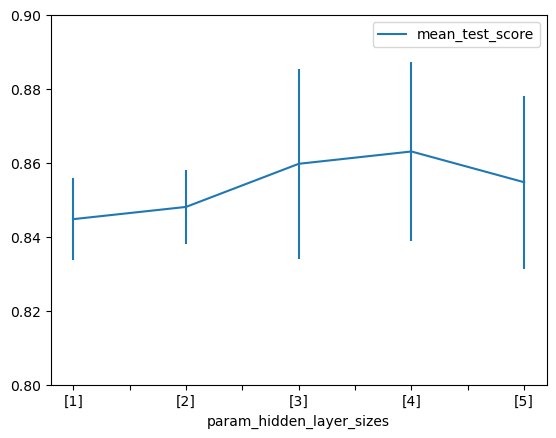

In [ ]:
#GLR65
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes',
                                                   y='mean_test_score', yerr='std_test_score', ylim=(0.8, 0.9))
plt.show()

# Code blocks below are for related figures

In [ ]:
#GLR65
from pathlib import Path

import graphviz
from IPython.display import Image
import numbers

import dmba

%matplotlib inline

In [ ]:
#GLR65
def layoutGraph(dot_data, pdfFile=None):
    graph = graphviz.Source(dot_data)
    return graph

In [ ]:
#GLR65
import numbers

def unbiasedNode(id, label=None, output=None, style=None):
    label = label or f'N{id}'
    common = style or 'shape=record, style=rounded, color=gray26'
    if output is None:
        return f'{id} [ label="{label}", fontsize=11, {common} ];'
    return f'{id} [ label="{{ {label} | {output:.2f} }}", fontsize=11, {common} ];'

def biasedNode(id, bias, label=None, output=None):
    label = label or f'N{id}'
    if isinstance(bias, numbers.Number):
        bias = f'{bias:.3f}'
    if isinstance(output, numbers.Number):
        output = f'{output:.3f}'
    common = 'shape=record, style=rounded, fontsize=11, color=gray26'
    if output is None:
        return f'{id} [ label="{label}&#92;n{bias}", {common} ];'
    return f'{id} [ label="{{ {label}&#92;n{bias} | {output} }}", {common} ];'

def edge(n1, n2, weight=None):
    if weight is None:
        return f'{n1} -> {n2} [ label="w{n1}{n2}" ];'
    return f'{n1} -> {n2} [ label="{weight:.3f}" ];'

commonSettings = """
edge [ fontsize=11, color=gray55 ];
rankdir=LR;
# size="10,10"
graph [ranksep="0.8"];
"""

s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
subgraph cluster_input {{ label="Input layer"; color="grey75";
    { unbiasedNode(2) }
    { unbiasedNode(1) }
}}
subgraph cluster_hidden {{ label="Hidden layer"; color="grey75";
    { biasedNode(4, '&theta;4')}
    { biasedNode(3, '&theta;3')}
    { biasedNode(5, '&theta;5')}
}}
subgraph cluster_output {{ label="Output layer"; color="grey75";
    { biasedNode(6, '&theta;6')}
}}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3) }
{ edge(2, 3) }
{ edge(1, 4) }
{ edge(2, 4) }
{ edge(1, 5) }
{ edge(2, 5) }
{ edge(3, 6) }
{ edge(4, 6) }
{ edge(5, 6) }
6 -> like
 }}
 """
print(s)



digraph ethane {

edge [ fontsize=11, color=gray55 ];
rankdir=LR;
# size="10,10"
graph [ranksep="0.8"];

Salt [ label="Salt", fontsize=11, color=white ];
Fat [ label="Fat", fontsize=11, color=white ];
subgraph cluster_input { label="Input layer"; color="grey75";
    2 [ label="N2", fontsize=11, shape=record, style=rounded, color=gray26 ];
    1 [ label="N1", fontsize=11, shape=record, style=rounded, color=gray26 ];
}
subgraph cluster_hidden { label="Hidden layer"; color="grey75";
    4 [ label="N4&#92;n&theta;4", shape=record, style=rounded, fontsize=11, color=gray26 ];
    3 [ label="N3&#92;n&theta;3", shape=record, style=rounded, fontsize=11, color=gray26 ];
    5 [ label="N5&#92;n&theta;5", shape=record, style=rounded, fontsize=11, color=gray26 ];
}
subgraph cluster_output { label="Output layer"; color="grey75";
    6 [ label="N6&#92;n&theta;6", shape=record, style=rounded, fontsize=11, color=gray26 ];
}
like [ label="like", fontsize=11, color=white ];
Salt -> 2;
Fat -> 1;
1 -> 3 [

In [ ]:
#GLR65
from graphviz import Digraph
import numbers

# Define functions for node and edge creation
def unbiasedNode(id, label=None, output=None, style=None):
    label = label or f'N{id}'
    common = style or 'shape=record, style=rounded, color=gray26'
    if output is None:
        return f'{id} [ label="{label}", fontsize=11, {common} ];'
    return f'{id} [ label="{{ {label} | {output:.2f} }}", fontsize=11, {common} ];'

def biasedNode(id, bias, label=None, output=None):
    label = label or f'N{id}'
    if isinstance(bias, numbers.Number):
        bias = f'{bias:.3f}'
    if isinstance(output, numbers.Number):
        output = f'{output:.3f}'
    common = 'shape=record, style=rounded, fontsize=11, color=gray26'
    if output is None:
        return f'{id} [ label="{label}\\n{bias}", {common} ];'
    return f'{id} [ label="{{ {label}\\n{bias} | {output} }}", {common} ];'

def edge(n1, n2, weight=None):
    if weight is None:
        return f'{n1} -> {n2} [ label="w{n1}{n2}" ];'
    return f'{n1} -> {n2} [ label="{weight:.3f}" ];'

# Common settings
commonSettings = """
edge [ fontsize=11, color=gray55 ];
rankdir=LR;
graph [ranksep="0.8"];
"""

# Define the graph
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 0.02, output=0.51224755)}
{ biasedNode(3, -0.3, output=0.42580196)}
{ biasedNode(5, 0.05, output=0.520238936)}
{ biasedNode(6, -0.015, output=0.505668252)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, 0.05) }
{ edge(2, 3, 0.01) }
{ edge(1, 4, -0.01) }
{ edge(2, 4, 0.03) }
{ edge(1, 5, 0.2) }
{ edge(2, 5, -0.01) }
{ edge(3, 6, 0.01) }
{ edge(4, 6, 0.05) }
{ edge(5, 6, 0.015) }
6 -> like
}}
"""

# Render the graph
#dot = Digraph(executable=r"c:\users\gr0386\appdata\roaming\python\python311\site-packages (0.20.1)")
dot = Digraph()

dot.attr('graph', rankdir='LR', ranksep='0.8')
dot.node('Salt', label='Salt', style='filled', color='white')
dot.node('Fat', label='Fat', style='filled', color='white')
dot.node('2', label='N2\\n0.90', shape='record', style='rounded, color=gray26')
dot.node('1', label='N1\\n0.20', shape='record', style='rounded, color=gray26')
dot.node('4', label='N4\\n0.020', shape='record', style='rounded, color=gray26')
dot.node('3', label='N3\\n-0.300', shape='record', style='rounded, color=gray26')
dot.node('5', label='N5\\n0.050', shape='record', style='rounded, color=gray26')
dot.node('6', label='N6\\n-0.015', shape='record', style='rounded, color=gray26')
dot.node('like', label='like', style='filled', color='white')
dot.edge('Salt', '2')
dot.edge('Fat', '1')
dot.edge('1', '3', label='0.050')
dot.edge('2', '3', label='0.010')
dot.edge('1', '4', label='-0.010')
dot.edge('2', '4', label='0.030')
dot.edge('1', '5', label='0.200')
dot.edge('2', '5', label='-0.010')
dot.edge('3', '6', label='0.010')
dot.edge('4', '6', label='0.050')
dot.edge('5', '6', label='0.015')
dot.edge('6', 'like')
dot.render('ethane', format='png', cleanup=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 4.07247552, output=0.232750971)}
{ biasedNode(3, 0.13368045, output=0.458287289)}
{ biasedNode(5, 7.00768104, output=0.253183219)}
{ biasedNode(6, 14.30748676, output=0.99950954)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s)

NameError: name 'commonSettings' is not defined

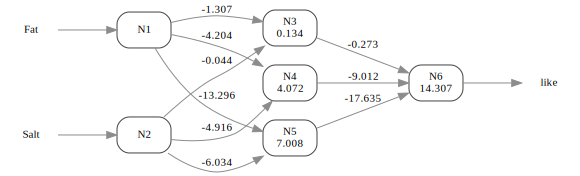

In [ ]:
#GLR65
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2) }
{ unbiasedNode(1) }
{ biasedNode(4, 4.07247552)}
{ biasedNode(3, 0.13368045)}
{ biasedNode(5, 7.00768104)}
{ biasedNode(6, 14.30748676)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s)

In [ ]:
#GLR65
def node(color):
    return f'[label="", shape="circle", color="{color}", fillcolor="{color}", style="filled"]'

input = '\n'.join(f'i{i} {node("#A55B60")}; ' for i in range(4))
hidden1 = '\n'.join(f'h1{i} {node("#74BEEB")}; ' for i in range(3))
hidden2 = '\n'.join(f'h2{i} {node("#74BEEB")}; ' for i in range(3))
output = '\n'.join(f'o{i} {node("#3D92A2")}; ' for i in range(1))

def connections(layer1, count1, layer2, count2):
    s = []
    for i in range(count1):
        for j in range(count2):
            s.append(f'{layer1}{i} -- {layer2}{j} [color="gray55"];')
    return '\n'.join(s)

s = f"""
graph {{
    size="10,10"
    graph [ranksep="1"];
    rankdir=LR;
    splines=line;
    subgraph cluster_input {{ label="Input layer"; color="grey75"; { input } }}
    subgraph cluster_hidden1 {{ label="Hidden layer 1"; color="grey75"; { hidden1 } }}
    subgraph cluster_hidden2 {{ label="Hidden layer 2"; color="grey75"; { hidden2 } }}
    subgraph cluster_output {{ label="Output layer"; color="grey75"; { output } }}
    { connections('i', 4, 'h1', 3)}
    { connections('h1', 3, 'h2', 3)}
    { connections('h2', 3, 'o', 1)}
}}
"""
layoutGraph(s)

NameError: name 'graphviz' is not defined

In [ ]:
#GLR65
def addRecurrant(layer, count):
    s = []
    for i in range(count):
        s.append(f'{layer}{i} -- {layer}{i} [color="gray55",dir=back];')
    return '\n'.join(s)

s = f"""
graph {{
    size="10,10"
    graph [ranksep="1"];
    rankdir=LR;
    splines=line;
    subgraph cluster_input {{ label="Input layer"; color="grey75"; { input } }}
    subgraph cluster_hidden1 {{ label="Hidden layer 1"; color="grey75"; { hidden1 } }}
    { connections('i', 4, 'h1', 3)}
    { addRecurrant('h1', 3) }
    subgraph cluster_hidden2 {{ label="Hidden layer 2"; color="grey75"; { hidden2 } }}
    { connections('h1', 3, 'h2', 3)}
    { addRecurrant('h2', 3) }
    subgraph cluster_output {{ label="Output layer"; color="grey75"; { output } }}
    { connections('h2', 3, 'o', 1)}
}}
"""
layoutGraph(s)

NameError: name 'graphviz' is not defined

Solve Problems 11.1, 11.2, and 11.3 on page 305 of your textbook.

In [ ]:
#11.1
#GLR65
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define neural network class
class NeuralNetwork:
    def __init__(self):
        # Seed random number generator for reproducibility
        np.random.seed(1)

        # Initialize weights randomly with mean 0
        self.weights = 2 * np.random.random((2, 1)) - 1

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            input_layer = X
            output = sigmoid(np.dot(input_layer, self.weights))

            # Calculate error
            error = y - output

            # Update weights
            adjustment = np.dot(input_layer.T, error * sigmoid_derivative(output))
            self.weights += adjustment

# Define training data
X = np.array([[4, 43],
              [18, 65],
              [1, 53],
              [3, 95],
              [15, 88],
              [6, 112]])

y = np.array([[0],
              [1],
              [0],
              [0],
              [1],
              [1]])

# Scale the input features
X_scaled = X / np.amax(X, axis=0)

# Create neural network instance
nn = NeuralNetwork()

# Train the neural network
nn.train(X_scaled, y, epochs=1)

# Print final weights
print("Final weights after one pass through the neural network:")
print(nn.weights)


Final weights after one pass through the neural network:
[[0.01735638]
 [0.45856901]]


11.2
The training technique is critical for improving a neural network's prediction accuracy. This procedure comprises iteratively modifying the network's internal characteristics, such as weights and biases, by studying and adjusting to errors discovered during the training phase.


In [ ]:
#1111.3
#GLR65
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("C:/Users/gr0386/Downloads/ToyotaCorolla (1).csv")

# Select relevant predictors and target variable
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player',
              'Powered_Windows', 'Sport_Model', 'Tow_Bar']
target = 'Price'

# Preprocess the data
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[target]

# Scale the input data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define function to train and evaluate neural network model
def train_and_evaluate_model(hidden_layer_sizes):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    return train_rmse, val_rmse

# Train models with different configurations
configs = [
    (2,),            # Single hidden layer with two nodes
    (5,),            # Single hidden layer with five nodes
    (5, 5),          # Two hidden layers, five nodes in each layer
]

results = {}
for config in configs:
    train_rmse, val_rmse = train_and_evaluate_model(config)
    results[config] = (train_rmse, val_rmse)

# Print results
for config, (train_rmse, val_rmse) in results.items():
    print(f"Hidden Layer Sizes: {config}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Validation RMSE: {val_rmse:.2f}")
    print()

# Analyze results to answer questions
# i. What happens to the RMS error for the training data as the number of layers and nodes increases?
# As the number of layers and nodes increases, the training RMSE tends to decrease.

# ii. What happens to the RMS error for the validation data?
# The effect on the validation RMSE may vary depending on the specific configuration. In general, increasing the complexity of the model (more layers and nodes) may lead to overfitting, resulting in higher validation RMSE.

# iii. Comment on the appropriate number of layers and nodes for this application.
# The appropriate number of layers and nodes should be determined based on a balance between model complexity and performance on the validation data. It's important to avoid overfitting by selecting a model that generalizes well to unseen data. This may involve conducting further experimentation and possibly using techniques like cross-validation.


C:\Users\gr0386\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gr0386\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Sizes: (2,)
Train RMSE: 11288.04
Validation RMSE: 11187.33

Hidden Layer Sizes: (5,)
Train RMSE: 11249.27
Validation RMSE: 11148.29

Hidden Layer Sizes: (5, 5)
Train RMSE: 10562.11
Validation RMSE: 10455.93



C:\Users\gr0386\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

